<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      2888 non-null   float64
 1   V1      2888 non-null   float64
 2   V2      2888 non-null   float64
 3   V3      2888 non-null   float64
 4   V4      2888 non-null   float64
 5   V5      2888 non-null   float64
 6   V6      2888 non-null   float64
 7   V7      2888 non-null   float64
 8   V8      2888 non-null   float64
 9   V9      2888 non-null   float64
 10  V10     2888 non-null   float64
 11  V11     2888 non-null   float64
 12  V12     2888 non-null   float64
 13  V13     2888 non-null   float64
 14  V14     2888 non-null   float64
 15  V15     2888 non-null   float64
 16  V16     2888 non-null   float64
 17  V17     2888 non-null   float64
 18  V18     2888 non-null   float64
 19  V19     2888 non-null   float64
 20  V20     2888 non-null   float64
 21  V21     2888 non-null   float64
 22  

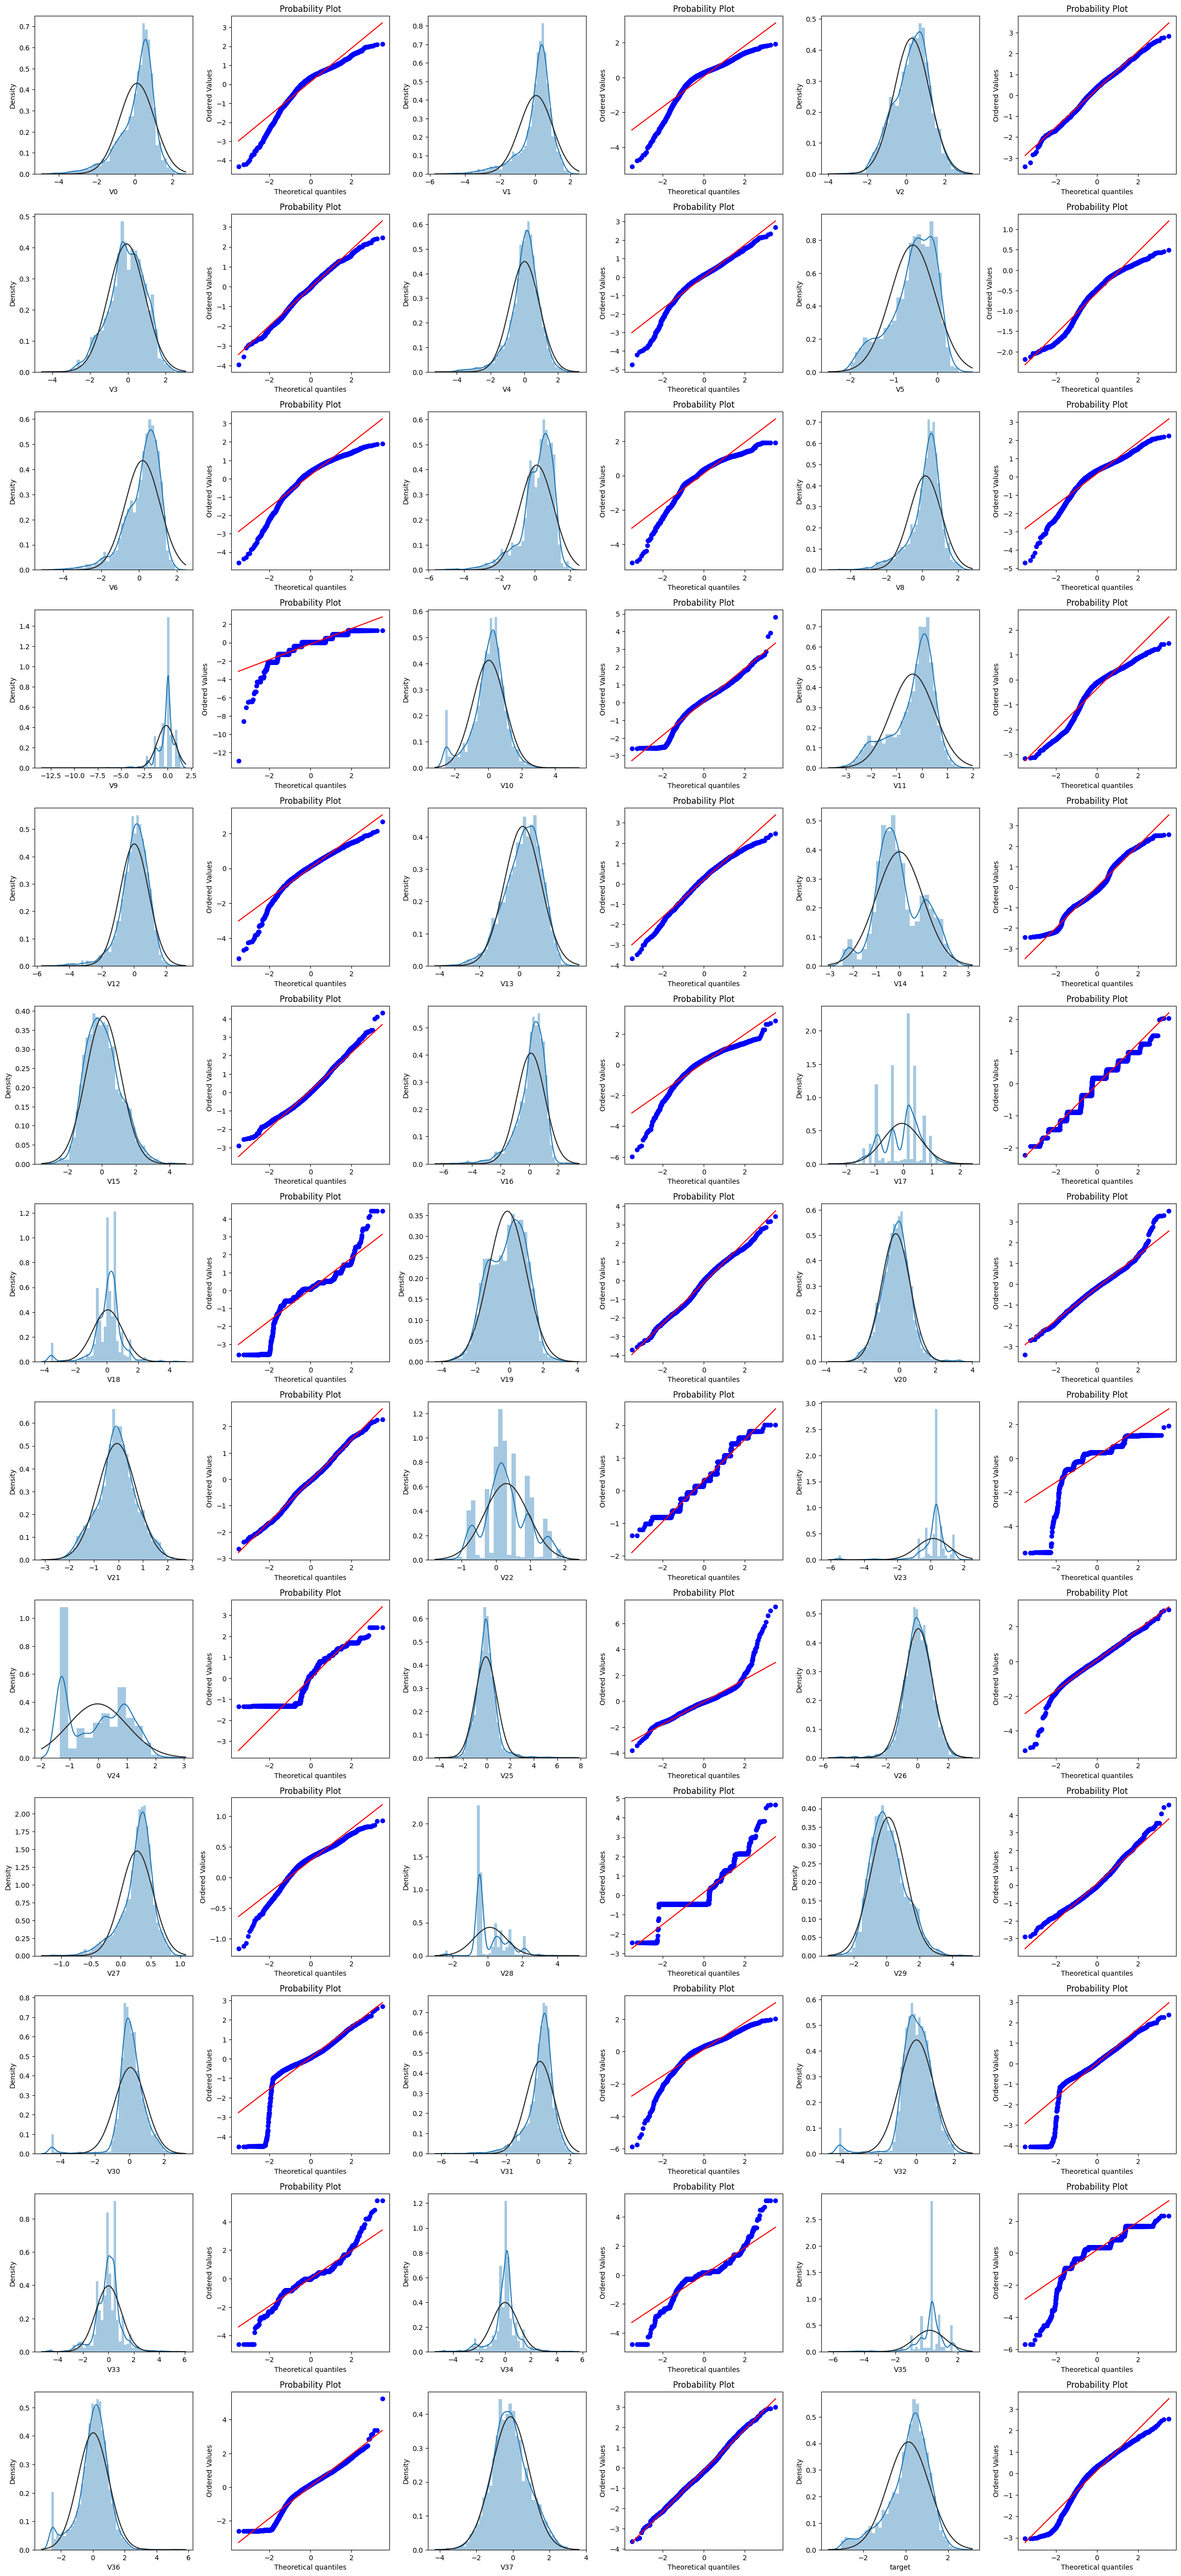

LinearRegression:  0.11211393372601652


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
##################################
# matplotlib inline
data_file = "Industrial_data_for regression_analysis.txt"
data = pd.read_csv(data_file,sep='\t',encoding='utf-8')
data.info()
######################################################
data.describe()
######################################################
fig_cols = 6
fig_rows = len(data.columns)
plt.figure(figsize=(4*fig_cols,4*fig_rows))

i=0
for col in data.columns:
    i+=1
    ax=plt.subplot(fig_rows,fig_cols,i)
    sns.distplot(data[col],fit=stats.norm)
    
    i+=1
    ax=plt.subplot(fig_rows,fig_cols,i)
    res = stats.probplot(data[col],plot=plt)
plt.tight_layout()
plt.show()
####################################################
from sklearn.model_selection import train_test_split
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
######################################################
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
clf = LinearRegression()
clf.fit(X_train,y_train)
score = mean_squared_error(y_test,clf.predict(X_test))
print("LinearRegression: ", score)
#####################################################



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
data_file = "Industrial_data_for regression_analysis.txt"
data = pd.read_csv(data_file,sep='\t',encoding='utf-8')
#data.info()

In [9]:
#data.describe()

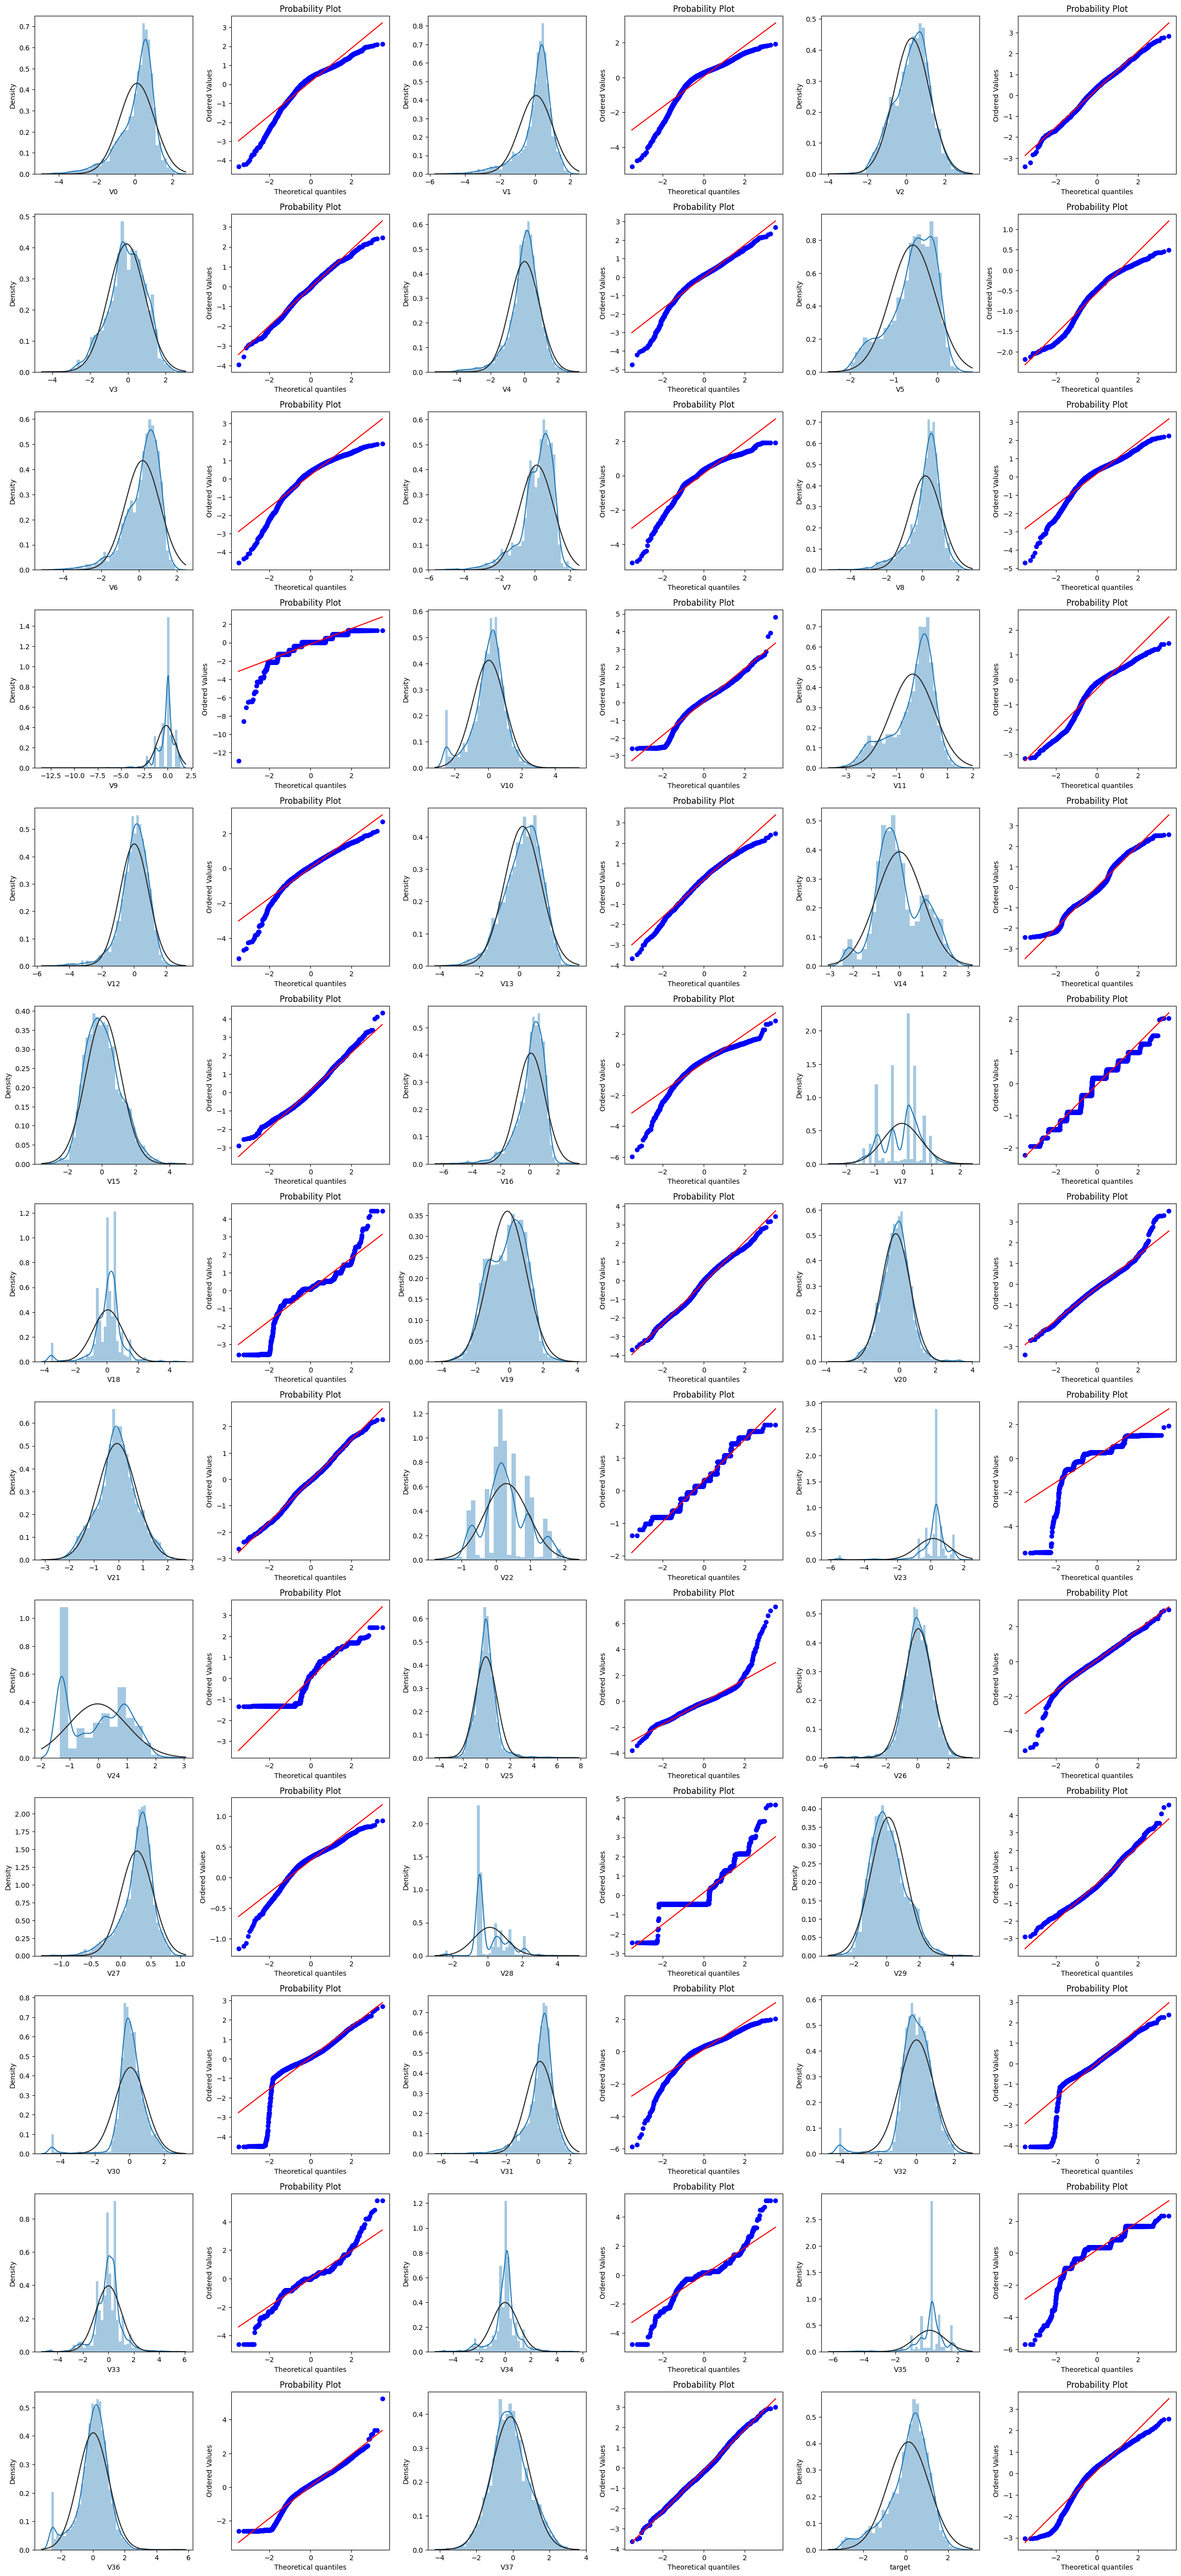

In [10]:
fig_cols = 6
fig_rows = len(data.columns)
plt.figure(figsize=(4*fig_cols,4*fig_rows))

i=0
for col in data.columns:
    i+=1
    ax=plt.subplot(fig_rows,fig_cols,i)
    sns.distplot(data[col],fit=stats.norm)
    
    i+=1
    ax=plt.subplot(fig_rows,fig_cols,i)
    res = stats.probplot(data[col],plot=plt)
plt.tight_layout()
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
clf = LinearRegression()
clf.fit(X_train,y_train)
score = mean_squared_error(y_test,clf.predict(X_test))
print("LinearRegression: ", score)

LinearRegression:  0.1219687471335046


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Load data
data_file = "Industrial_data_for regression_analysis.txt"
data = pd.read_csv(data_file, sep='\t', encoding='utf-8')

# Split data
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit model without preprocessing
clf = LinearRegression()
clf.fit(X_train, y_train)
score = mean_squared_error(y_test, clf.predict(X_test))
print("LinearRegression without Feature Engineering: ", score)

# Fit model with preprocessing
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
clf_preprocessed = LinearRegression()
clf_preprocessed.fit(X_train_pca, y_train)
X_test_pca = pca.transform(X_test)
score_preprocessed = mean_squared_error(y_test, clf_preprocessed.predict(X_test_pca))
print("LinearRegression with Feature Engineering: ", score_preprocessed)


LinearRegression without Feature Engineering:  0.10484983544368838
LinearRegression with Feature Engineering:  0.10484983544368834
